In [1]:
from dataset import Dataset
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import os
from model import *
import torch
import utils
from engine import  evaluate

In [2]:
PATH = './model/one_class_epoch_9_.pth'
DATASET = './dataset'
device = torch.device('cuda') 
dataset_test = Dataset(DATASET, get_transform(train=False))
torch.manual_seed(1)
indices = torch.randperm(len(dataset_test)).tolist()
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

In [3]:

model = get_instance_segmentation_model(2)
model.to(device)
state = torch.load(PATH)
model.load_state_dict(state.get('model_state_dict'))

<All keys matched successfully>

In [4]:
img, mask= dataset_test[2]
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

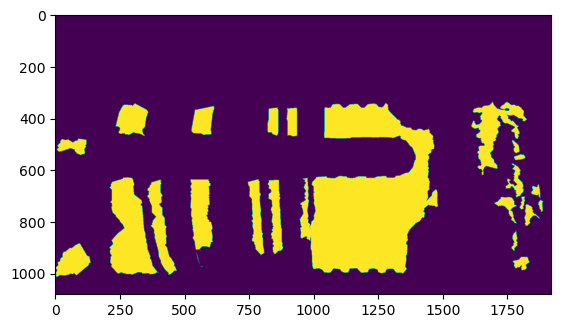

In [5]:
GT = mask['masks'][0].cpu().numpy()
plt.imshow(GT)

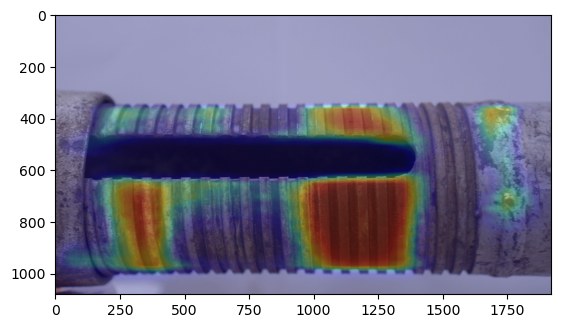

In [6]:
image = img.mul(255).permute(1, 2, 0).byte().numpy()
mask = prediction[0]['masks'][0, 0].cpu().numpy()
fig, ax = plt.subplots()
ax.imshow(image)
im = ax.imshow(mask, alpha=0.3, cmap='jet') 
plt.show()

In [8]:
data_loader = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, 
    collate_fn=utils.collate_fn)


In [9]:
evaluate(model, data_loader, device=device)

creating index...
index created!
Test:  [ 0/50]  eta: 0:00:21  model_time: 0.2890 (0.2890)  evaluator_time: 0.0440 (0.0440)  time: 0.4310  data: 0.0890  max mem: 1031
Test:  [49/50]  eta: 0:00:00  model_time: 0.1280 (0.1374)  evaluator_time: 0.0710 (0.0758)  time: 0.3044  data: 0.0820  max mem: 1163
Test: Total time: 0:00:15 (0.3066 s / it)
Averaged stats: model_time: 0.1280 (0.1374)  evaluator_time: 0.0710 (0.0758)
Accumulating evaluation results...
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.260
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.529
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.352
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | max